In [ ]:
# OS version
!cat /etc/os-release

PRETTY_NAME="Ubuntu 22.04.4 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.4 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [ ]:
# CPU info
!lscpu | grep "Model name\|Socket(s)\|Core(s) per socket\|Thread(s) per core"

Model name:                           Intel(R) Xeon(R) CPU @ 2.20GHz
Thread(s) per core:                   2
Core(s) per socket:                   1
Socket(s):                            1


In [ ]:
# Python version
import sys
print("Python version:", sys.version.split()[0])

Python version: 3.11.12


In [ ]:
# GPU info (if available)
!nvidia-smi --query-gpu=name,driver_version,memory.total --format=csv

name, driver_version, memory.total [MiB]
Tesla T4, 550.54.15, 15360 MiB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import seaborn as sns
import time
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yaaryiitturan/pendigits")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pendigits


In [ ]:
import os
import pandas as pd

df = pd.read_csv(os.path.join(path, "pendigits_txt.csv"), header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
1,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
2,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
3,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
4,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0,4
10989,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14,2
10990,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93,0
10991,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81,0


In [ ]:
# Remove duplicate header row
df = df.drop(index=0).reset_index(drop=True)

# Set column names
df.columns = ['input' + str(i+1) for i in range(16)] + ['class']

# Features and target
X = df.drop('class', axis=1).astype(float)
y = df['class'].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# =========================
# Decision Tree + GridSearch
# =========================

# parameter grid for DecisionTree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt, dt_param_grid, cv=3, n_jobs=-1)

start = time.time()
dt_grid.fit(X_train, y_train)
dt_time = time.time() - start

print("DT best params:", dt_grid.best_params_)
print(f"DT CV best score: {dt_grid.best_score_:.4f}")
print(f"DT training + search time: {dt_time:.2f}s\n")

y_pred_dt = dt_grid.predict(X_test)
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Test F1-score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

DT best params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
DT CV best score: 0.9586
DT training + search time: 9.63s

Decision Tree Test Accuracy: 0.9636198271941792
Decision Tree Test F1-score: 0.9636238752171034
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       241
           1       0.93      0.94      0.93       225
           2       0.97      0.96      0.96       235
           3       0.97      0.97      0.97       224
           4       0.97      0.98      0.98       215
           5       0.96      0.96      0.96       213
           6       0.98      0.99      0.98       199
           7       0.95      0.97      0.96       209
           8       0.95      0.97      0.96       212
           9       0.96      0.94      0.95       226

    accuracy                           0.96      2199
   macro avg       0.96      0.96      0.96      2

In [ ]:
# =========================
# Random Forest + GridSearch
# =========================

# parameter grid for RandomForest
rf_param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_param_grid, cv=3, n_jobs=-1)

start = time.time()
rf_grid.fit(X_train, y_train)
rf_time = time.time() - start

print("\nRF best params:", rf_grid.best_params_)
print(f"RF CV best score: {rf_grid.best_score_:.4f}")
print(f"RF training + search time: {rf_time:.2f}s\n")

y_pred_rf = rf_grid.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Test F1-score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


RF best params: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RF CV best score: 0.9915
RF training + search time: 384.39s

Random Forest Test Accuracy: 0.9936334697589814
Random Forest Test F1-score: 0.993628702794069
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      0.97      0.98       225
           2       0.98      1.00      0.99       235
           3       1.00      0.99      1.00       224
           4       1.00      1.00      1.00       215
           5       1.00      0.99      0.99       213
           6       1.00      1.00      1.00       199
           7       0.99      1.00      0.99       209
           8       0.99      1.00      0.99       212
           9       0.99      1.00      0.99       226

    accuracy                           0.99      2199
   macro a

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

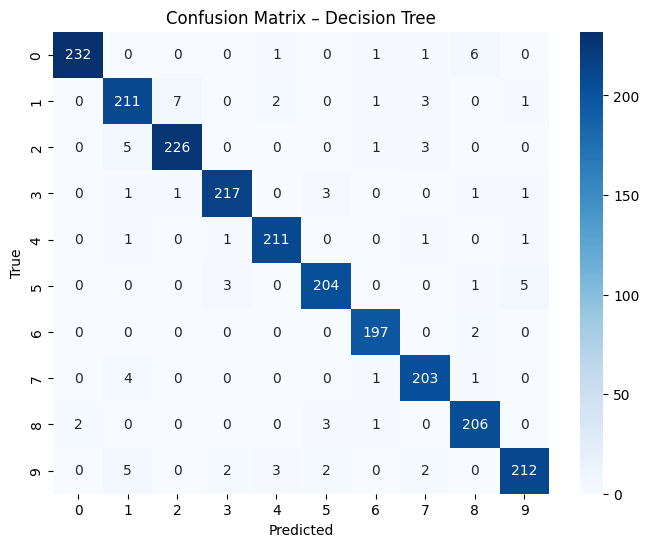

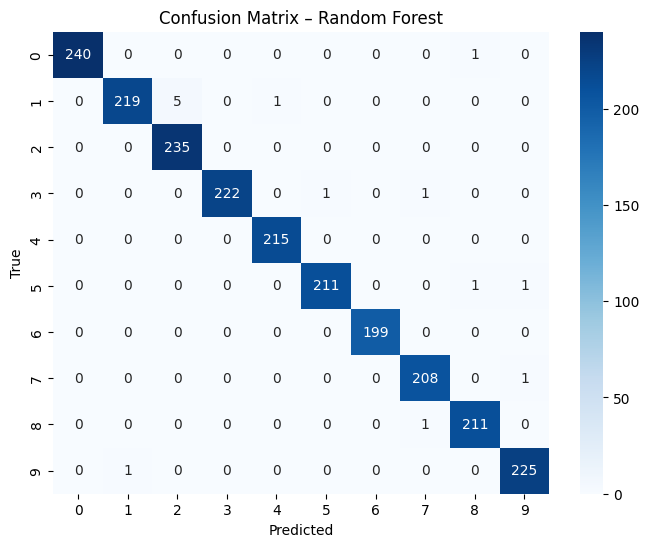

In [ ]:
# =========================
# Visualizations for Both Models
# =========================

from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# prepare true labels in binarized form for ROC
y_test_bin = label_binarize(y_test, classes=np.arange(10))

# list of (name, trained_grid, predictions)
models = [
    ('Decision Tree', dt_grid, y_pred_dt),
    ('Random Forest', rf_grid, y_pred_rf)
]

for name, grid, y_pred in models:
    # 1) Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix – {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

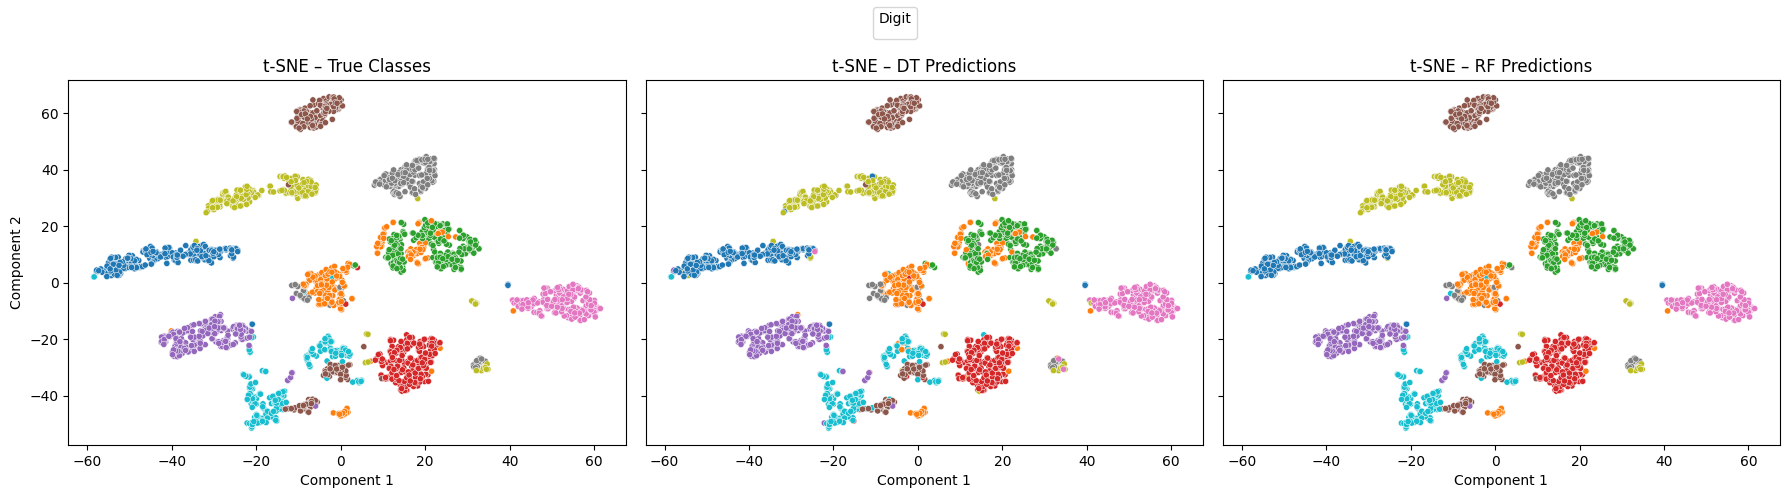

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Compute a 2D t-SNE embedding of the test set
tsne = TSNE(n_components=2, random_state=42, init='random', learning_rate='auto')
X_emb = tsne.fit_transform(X_test)

# Prepare subplot titles and corresponding label arrays
titles = ['True Classes', 'DT Predictions', 'RF Predictions']
hues   = [y_test,      y_pred_dt,        y_pred_rf]
palette = 'tab10'

# Create a figure with 3 side-by-side axes, sharing x and y scales
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)

for ax, title, hue in zip(axes, titles, hues):
    sns.scatterplot(
        x=X_emb[:, 0], y=X_emb[:, 1],
        hue=hue, palette=palette,
        legend=False, s=20, ax=ax
    )
    ax.set_title(f't-SNE – {title}')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')

# Extract handles and labels from the first subplot for a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Digit', loc='upper center', ncol=10)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()